<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Navigation<a id="topNav"></a>
#### 0. [Step 0: Exploratory Data Analysis (EDA)](#0)

#### 1. [Step 1: Load Data into Jupyter Notebook](#1)

#### 2. [Step 2: Data Preprocessing](#2)

#### 3. [Step 3: Train and Test Split](#3)

#### 4. [Step 4: Missing Value Imputation](#4)

#### 5. [Step 5: Categorical Data Encoding](#5)

#### 6. [Step 6: Variable Discretization /Binning](#6)

#### 7. [Step 7: Feature Engineer](#7)

#### 8. [Step 8: Linear Regression Modelling](#8)

#### 9. [Report](#9)

In [1]:
# import the pacakges

import numpy as np
import pandas as pd

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PolynomialFeatures

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder, CountFrequencyEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser, ArbitraryDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import PowerTransformer, YeoJohnsonTransformer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Step 0: Exploratory Data Analysis (EDA) <a id="0"></a>
[Back to top](#topNav)

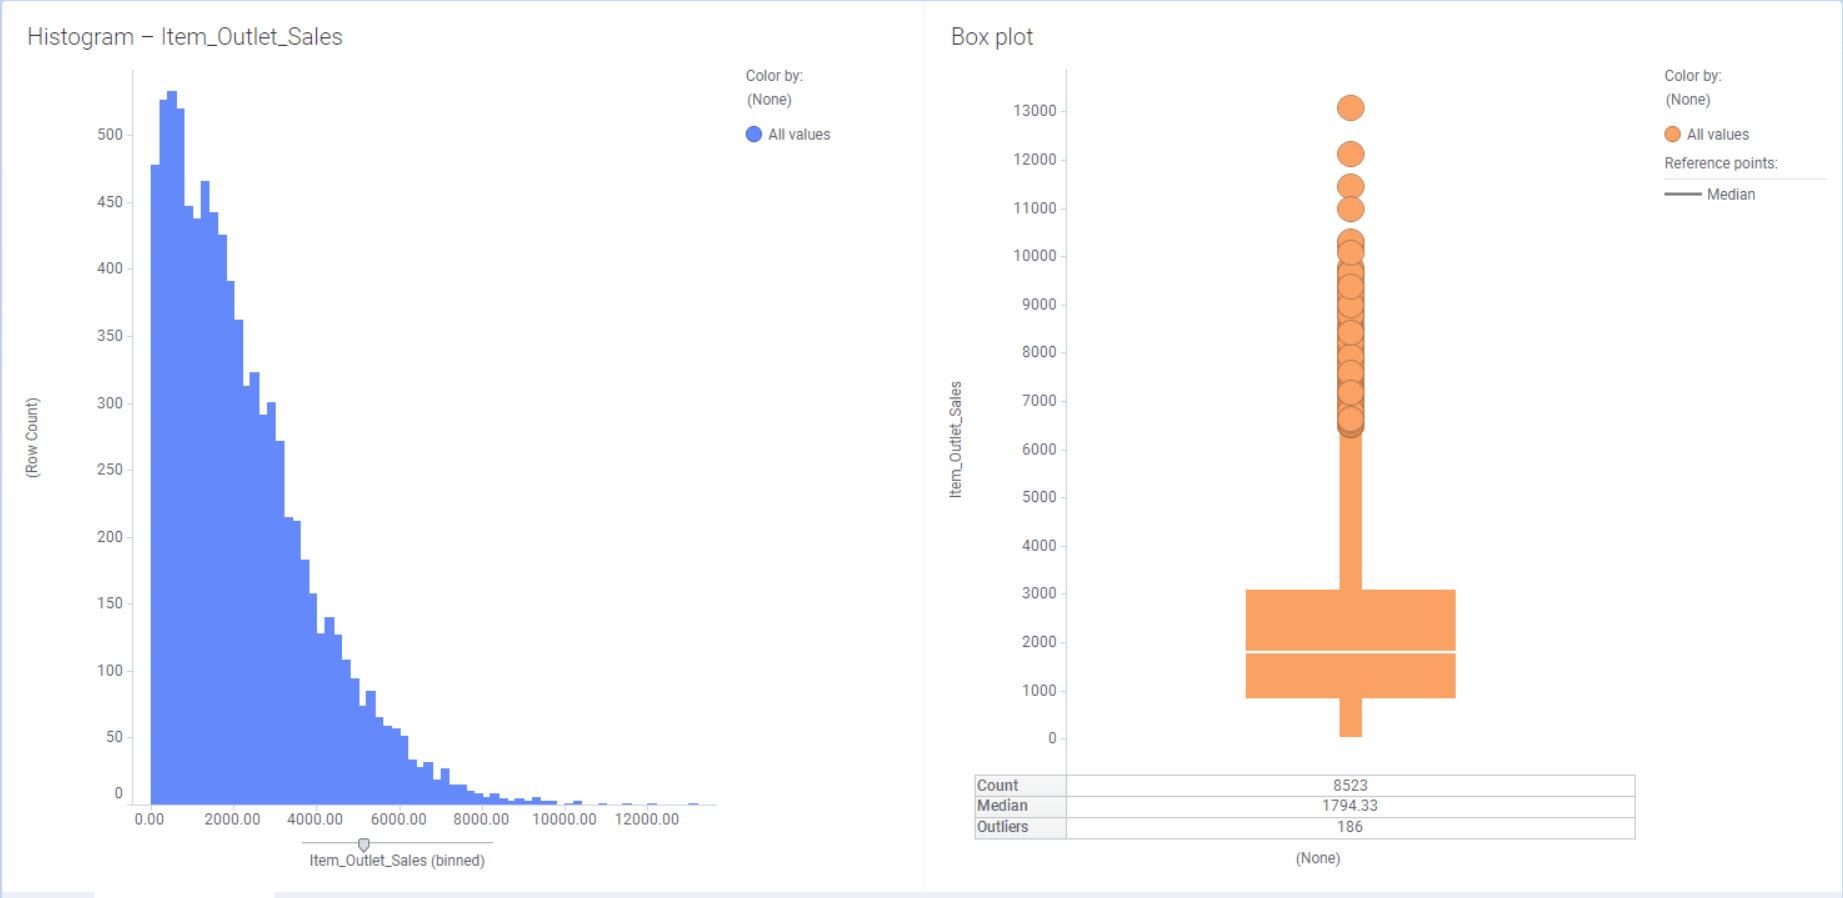

This shows a histogram and a boxplot of our target variable 'Item_Outlet_Sales'. WIth the help of this visualization, we are able to see how the item outlets sales are distributed which is right skewed. Furthemore, we also see from the boxplot that the target variable contains some outliers which we can remove later as it does not have that much outliers and it will not affect our overall model.

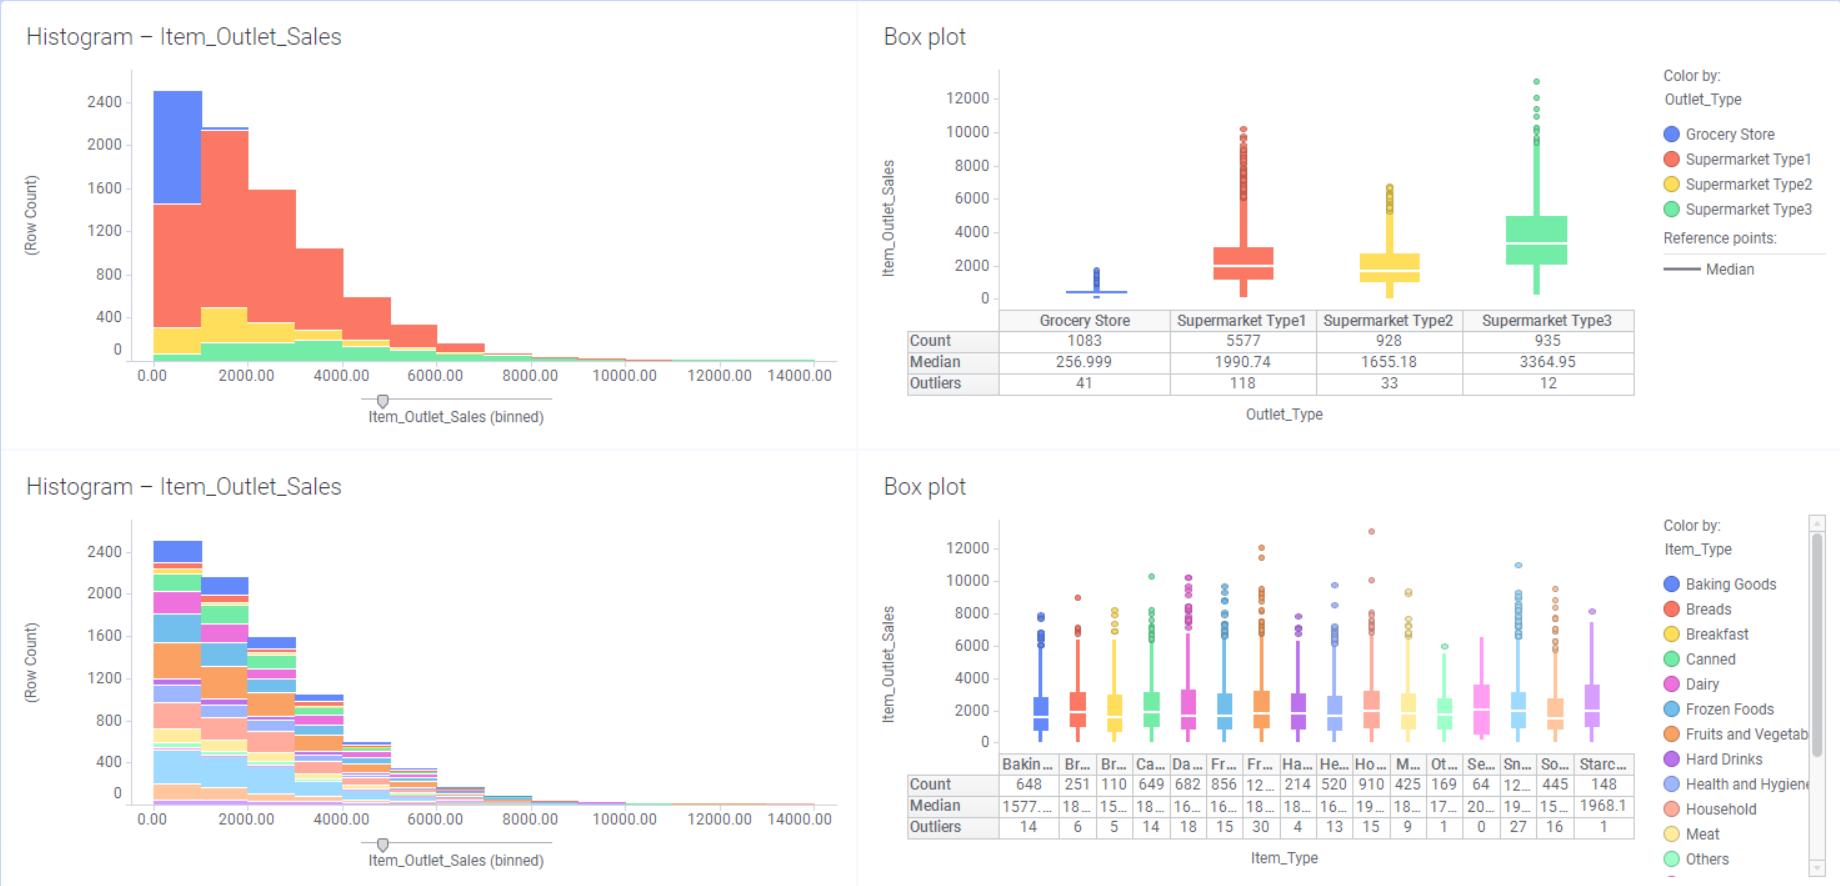

For this data exploration visualization, we have the same histogram and boxplot of our target variable 'Item_Outlet_Sales'. However, we split the colours of the histogram by Outlet Type as seen in the first row, and Item type as seen in the second row. From this, we are able to find out that most of the item outlet sales data comes from Supermarket Type 1 while the outlet type with the highest Item Outlet Sales comems from Supermarket Type 3. Furthermore, we see that there is a wide range of item type on our item outlet sales and cannot come to a conclusion that one item type is dominating the item outlet sales.

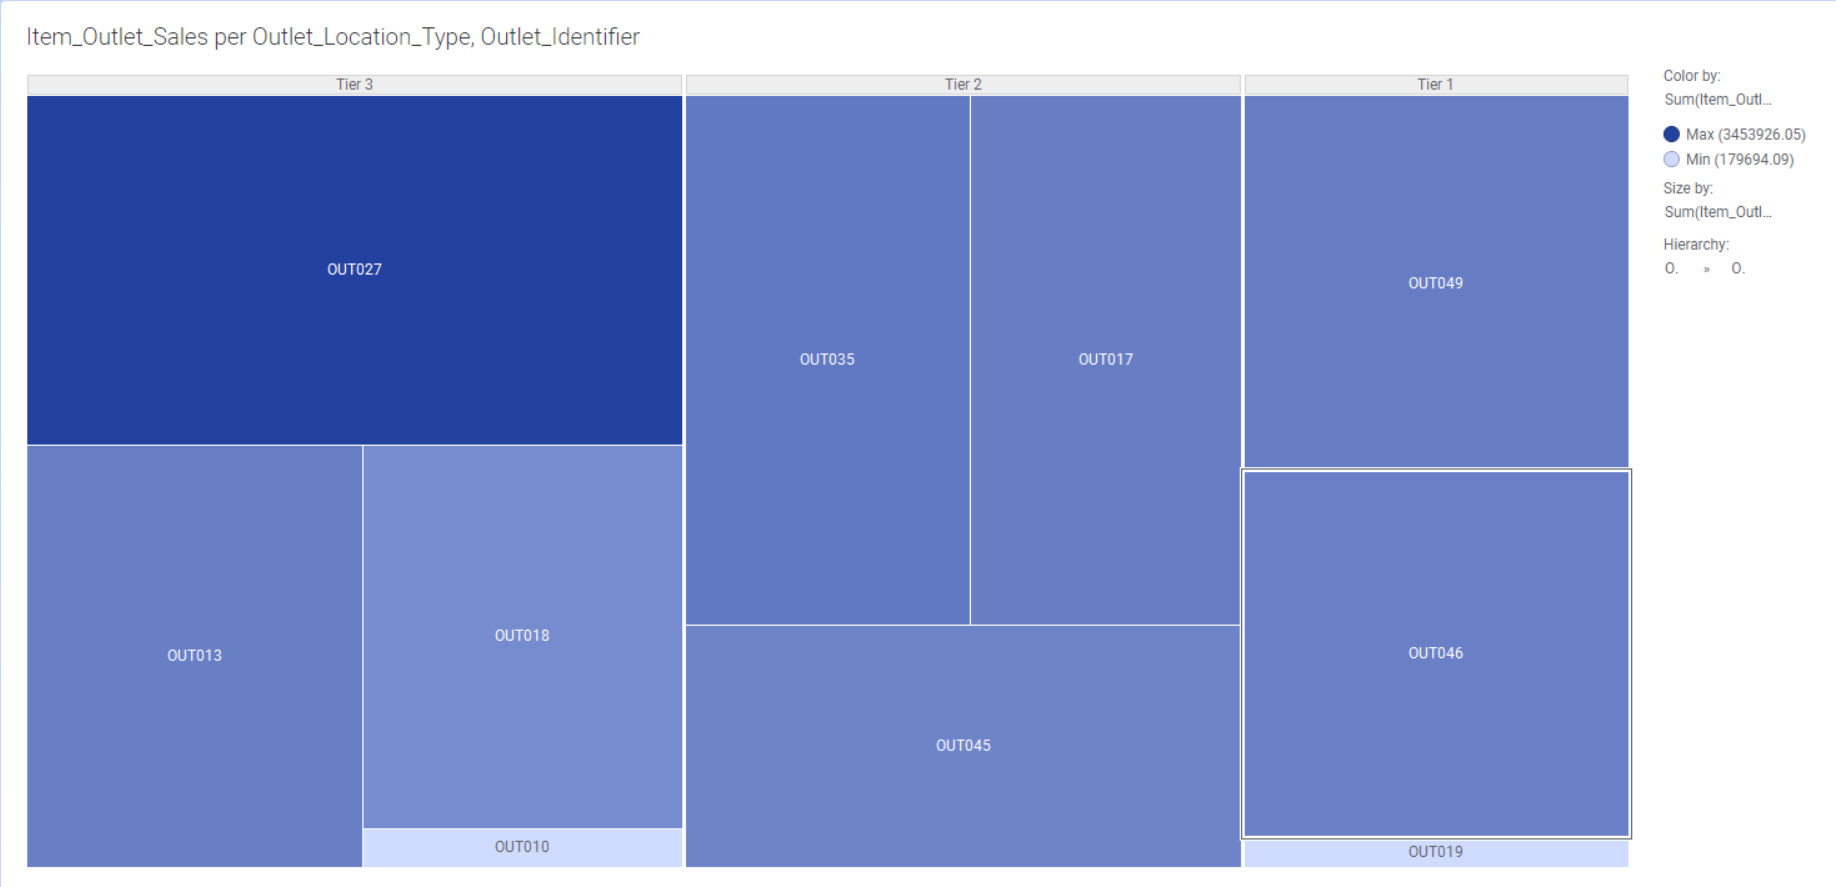

In this data exploration visualization, we have a treemap that shows the different outlets categorized by their Outlet Location Type and sized by their Item Outlet Sales. From what we see, the outletID OUT027 is doing the best among all tier 3 outlets is terms of item outlet sales. In addition, we see that tier 2 and tier 1 are not doing as good as tier 3. However, there are two outlets OUT010 and OUT019 not doing well in terms of their Item Outlet Sales. We can try to identify why their sales are low.

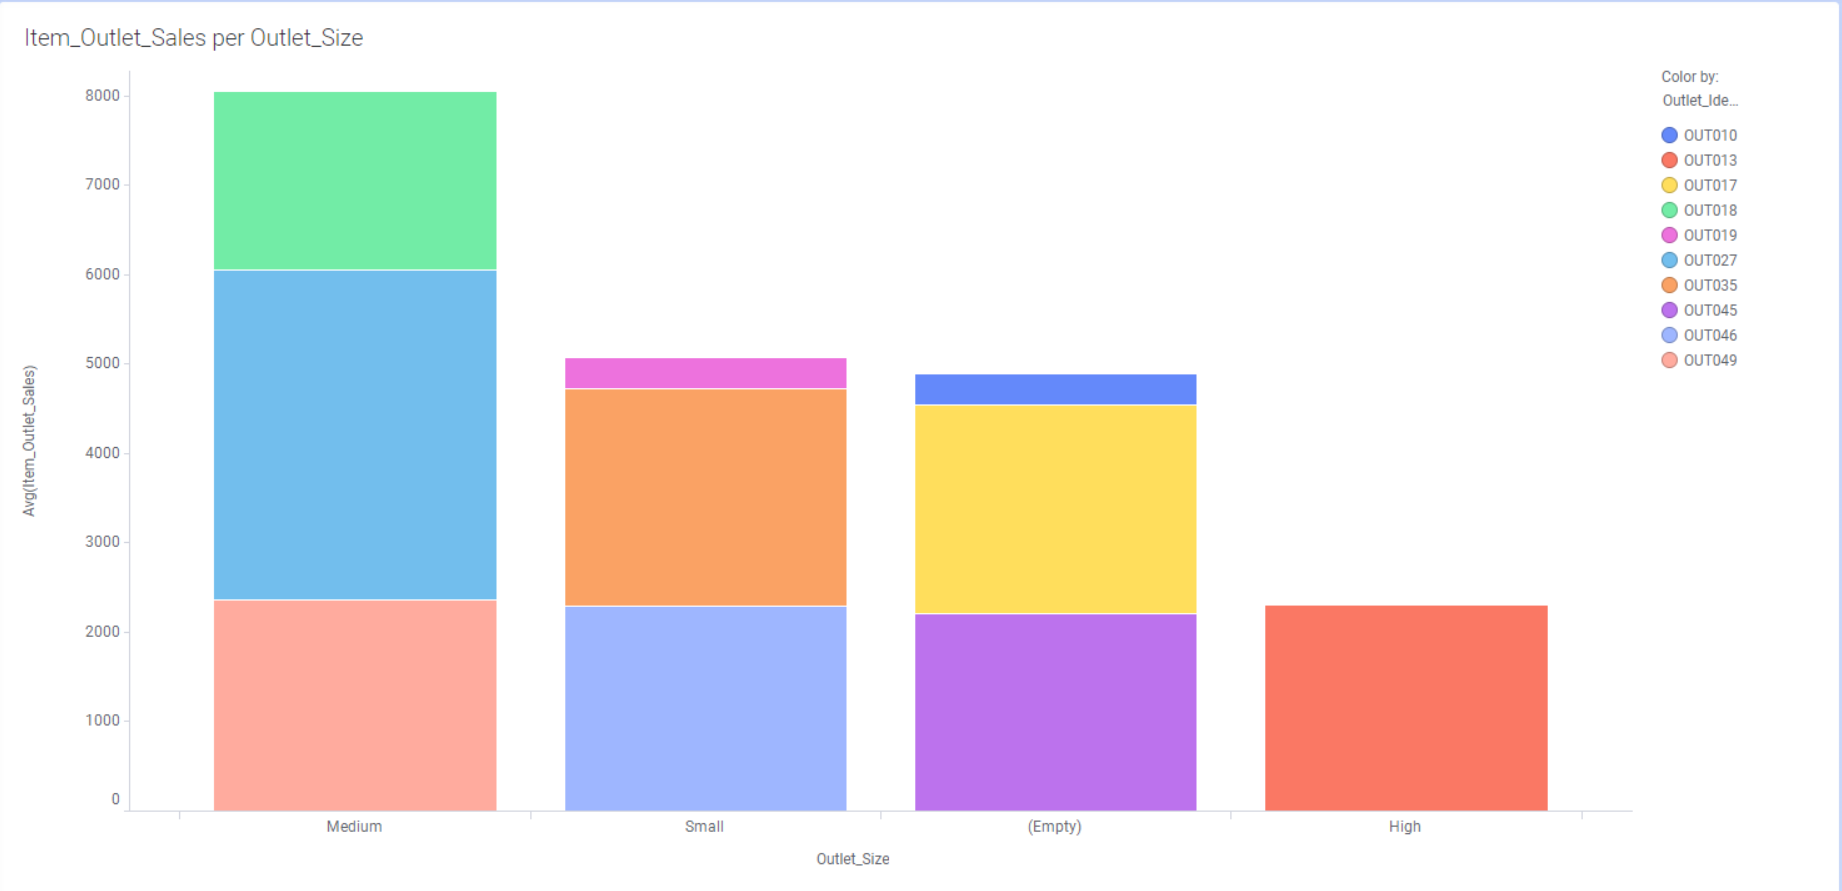

This visualization shows a bar chart of the Outlet Size over the the item outlet sales and differentiated by colour based on the different outlet. The first thing we notice is that there are null values in the data set as there is a column named 'Empty' in the visualization and we ought to perform data cleaning later on. Furthermore, we see that only one outlet has a high outlet size which is OUT013. To get back to the above outlet ID which are not doing well on the item outlet sales, we see that OUT010 is in the empty bar which we cant explain much and OUT019 is in the small outlet size, which might explain why it's item outlet sales is not doing too well.

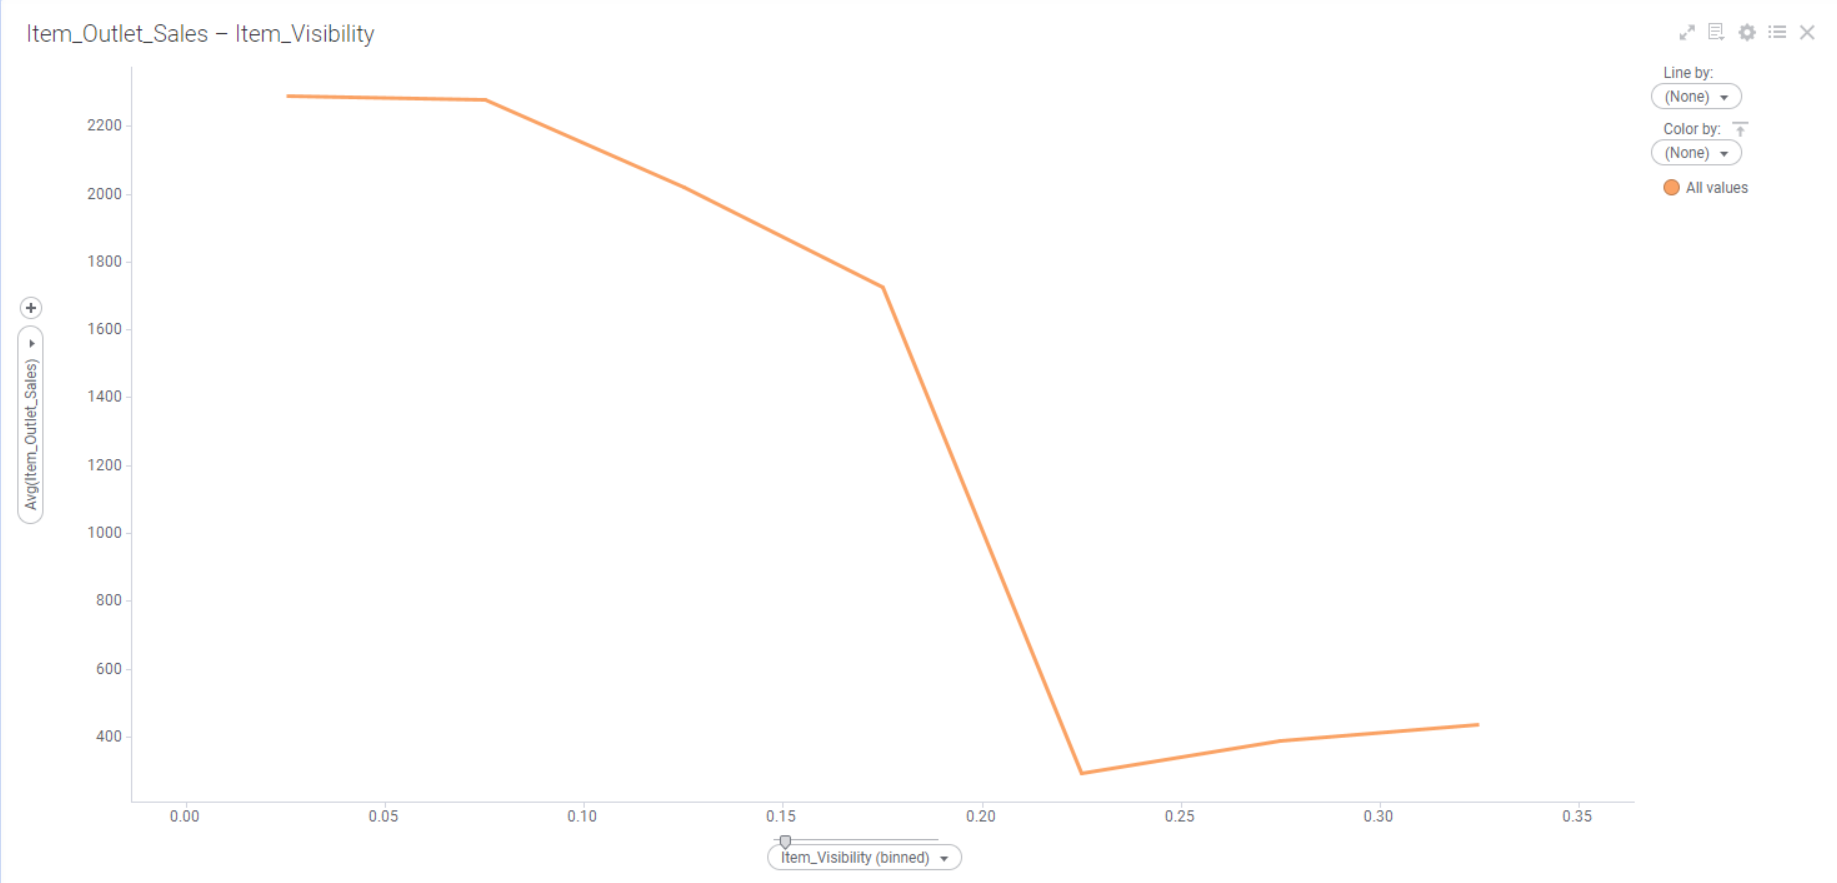

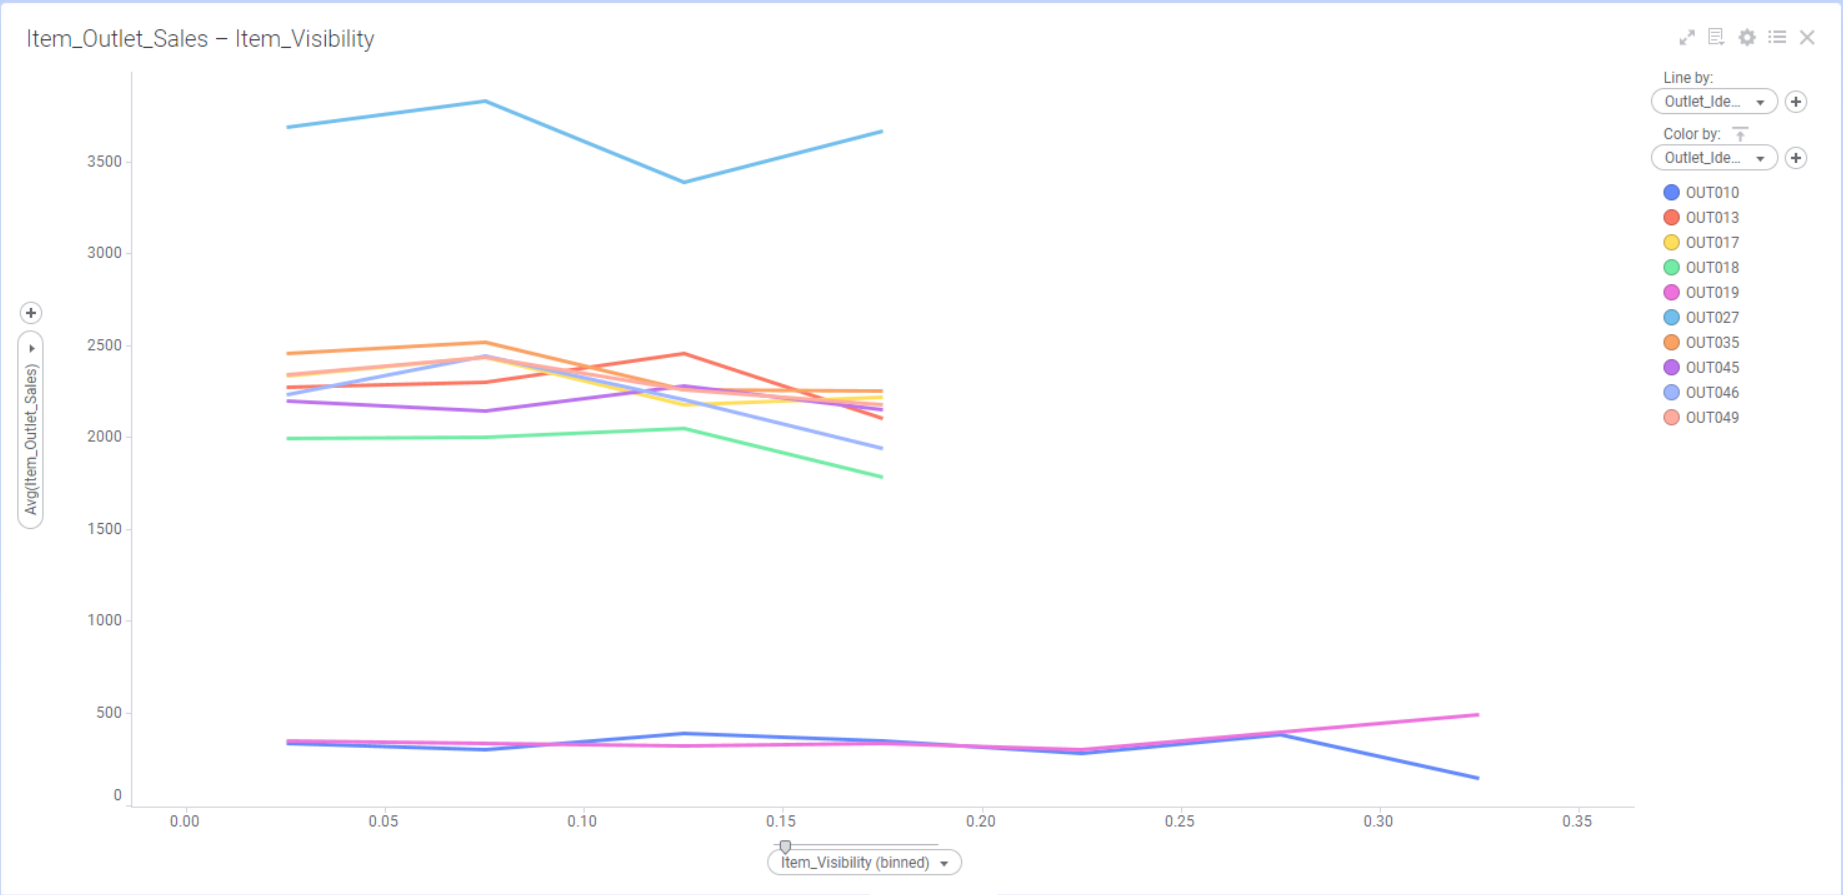

We have 2 line chart visualization here to show us the bigger picture and the drill down based on the outlet identifier. From the first visualization, we see that even though the item visibility is increasing, the average of the item outlet sales is decreasing, which might mean that there are some outlets pulling it down. When we drill it down based on the outlet, we see that it was because two outlets which is OUT010 and OUT019 pulling the average down. Also, we see that all the other outlets that are not OUT010 and OUT019 do not have item visibility more than around 0.18 whereas these two outlets have item visibility of up to 0.325. Hence, it could be the managers of the outlets not planning their item visibility well which may lead to bad item outlet sales.

### Step 1: Load Data into Jupyter Notebook <a id="1"></a>
[Back to top](#topNav)

In [2]:
# Let us import the supermarket.csv dataset to a python dataframe

data = pd.read_csv("supermarket.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# identifying the data type of each col
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# find out more info using data.describe to give us descriptive statistics
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# find the intial shape of the dataframe to consdier removing outliers
data.shape

(8523, 12)

In [6]:
# We will try to identify the unique values in each and see if there are any values that can be changed
for var in data.columns:
    print(var)
    print(data[var].unique())
    print()

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.6

We notice that for values in 'Item_Fat_Content', there are repeat values for 'Low Fat' and 'Regular'. Therefore, we will replace the values accordingly.

In [7]:
# replacing values for 'Low Fat'
data['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
data['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)

# replacing values for 'Regular'
data['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)

In [8]:
# Let us check the results (should contain 2 unique values)
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Step 2: Data Preprocessing <a id="2"></a>
[Back to top](#topNav)

In [9]:
# identify numeric columns
num_cols = [n for n in data.columns if data[n].dtypes in ['int64', 'float64']]
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

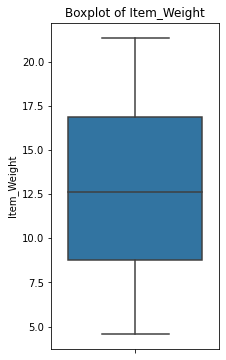

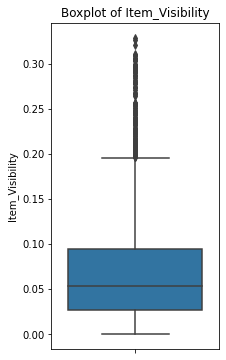

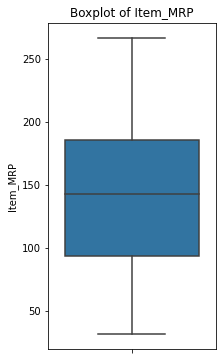

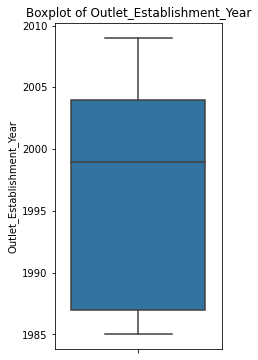

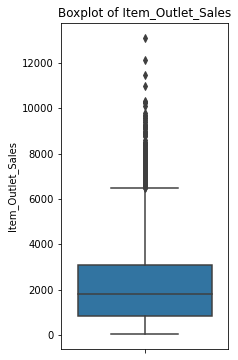

In [10]:
# identify if outliers are present with boxplot 

for col in num_cols:
    plt.figure(figsize=(3,6))
    sns.boxplot(y=data[col])
    plt.title('Boxplot of ' + col, size = 12)


In [11]:
# Columns 'Item_Visibility' and 'Item_Outlet_Sales' contain outliers
# Let's define a function to find the ouliers

def find_outliers(df, variable, distance):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lowerBoundary = df[variable].quantile(0.25) - (IQR * distance)
    upperBoundary = df[variable].quantile(0.75) + (IQR * distance)
    
    outliers = np.where(df[variable] > upperBoundary, True,
                       np.where(df[variable] < lowerBoundary, True, False))
    
    return outliers

In [12]:
# Outliers for 'Item_Visibility' and 'Item_Outlet_Sales'
IV_outliers = find_outliers(data, 'Item_Visibility', 1.5)
IOS_outliers = find_outliers(data, 'Item_Outlet_Sales', 1.5)

# lets print out some of the outliers
print("Outliers for Item_Visibility")
IV_outliers_df = data.loc[IV_outliers, 'Item_Visibility']
IV_outliers_df.head()

Outliers for Item_Visibility


49     0.255395
83     0.293418
108    0.278974
174    0.291865
334    0.204700
Name: Item_Visibility, dtype: float64

In [13]:
print("Outliers for Item_Outlet_Sales")
IOS_outliers_df = data.loc[IOS_outliers, 'Item_Outlet_Sales']
IOS_outliers_df.head()

Outliers for Item_Outlet_Sales


43     6768.5228
130    7968.2944
132    6976.2524
145    7370.4060
203    6704.6060
Name: Item_Outlet_Sales, dtype: float64

In [14]:
# Let's explore the distribution of 'Item_Visibility'and 'Item_Outlet_Sales'
# Create function to show Histogram, QQ plot, and Box-plot

def diagnostic_plots(df, variable):
        
    plt.figure(figsize=(16,4))
    
    # Histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable],bins=30)
    plt.title("Histogram")
    
    # QQ Plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    
    # Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot")
    
    plt.show()

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


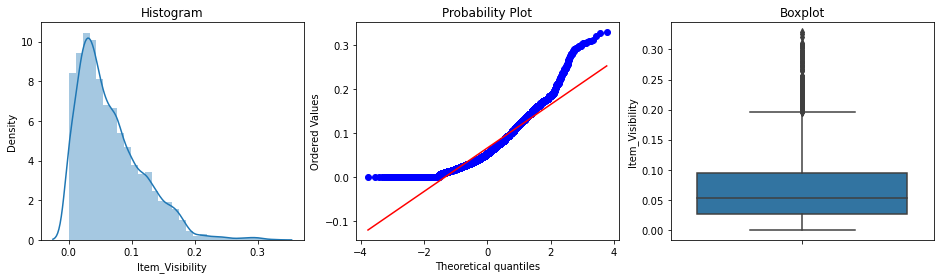

In [15]:
# plots for 'Item_Visibility'
diagnostic_plots(data, 'Item_Visibility')

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


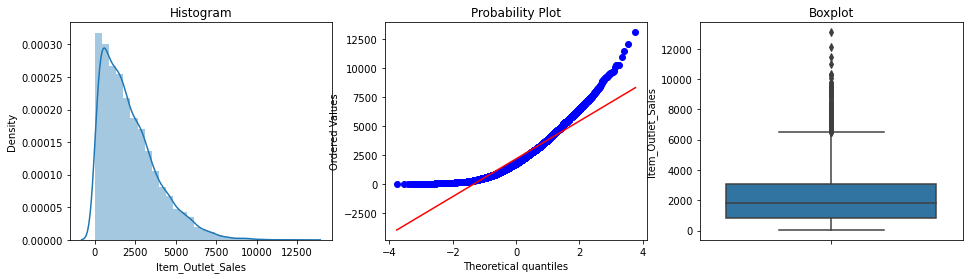

In [16]:
# plots for 'Item_Outlet_Sales'
diagnostic_plots(data, 'Item_Outlet_Sales')

In [17]:
# For the outliers for 'Item_Outlet_Sales', we will perform trimming

# we will check if trimming will largely affect our data
data_trimmed = data.loc[~IOS_outliers ]

data.shape, data_trimmed.shape

((8523, 12), (8337, 12))

In [18]:
# Since the trimming does not largely affect the dataset, we will trim them
data = data_trimmed

In [19]:
# To cap the outliers for 'Item_Visibility', we will perform winsorisation
winsorizer = Winsorizer(capping_method = 'quantiles',
                       tail = 'both',
                       fold = 0.05,
                       variables = 'Item_Visibility')

winsorizer.fit(data)

data = winsorizer.transform(data)

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


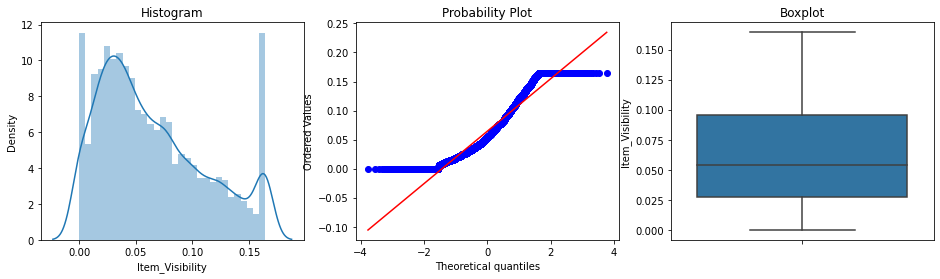

In [20]:
# The results of 'Item_Visibility' and 'Item_Outlet_Sales'
diagnostic_plots(data, 'Item_Visibility')

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


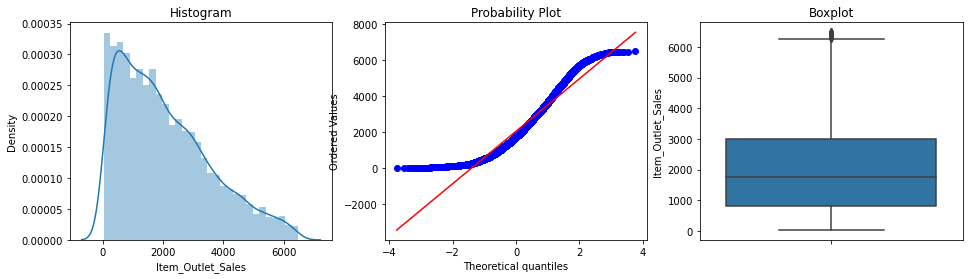

In [21]:
diagnostic_plots(data, 'Item_Outlet_Sales')

The winsorisation worked as it capped the outliers to IQR * 1.5 at the tails of the distribution and the trimming was able to remove outliers that are drastic. And as we can see from the histogram, the outliers for 'Item_Visibility' are capped around 0.00 and 0.17. The QQ plot shows how the data end the tails are now straight to represent it being capped at IQR * 1.5, and the boxplot does not show any outliers. However, the histogram is right skewed. Hence, we should transform numerical data to make it a normal distribution.

### Step 3: Train and Test Split <a id="3"></a>
[Back to top](#topNav)

In [22]:
# let's separate into training and testing set with 'Item_Outlet_Sales' as our target variable
X_train, X_test, y_train, y_test = train_test_split(data.drop('Item_Outlet_Sales', axis = 1),
                                                   data['Item_Outlet_Sales'],
                                                   test_size = 0.3,
                                                   random_state = 0)
X_train.shape, X_test.shape

((5835, 11), (2502, 11))

In [23]:
# we will remove the 'Item_Outlet_Sales' from the num_cols as it's our target variable
num_cols.remove('Item_Outlet_Sales') 

Let us check the plots for skewness of all numerical variables and try to transform them to be more normal for a quicker data processing when training our machine learning model.

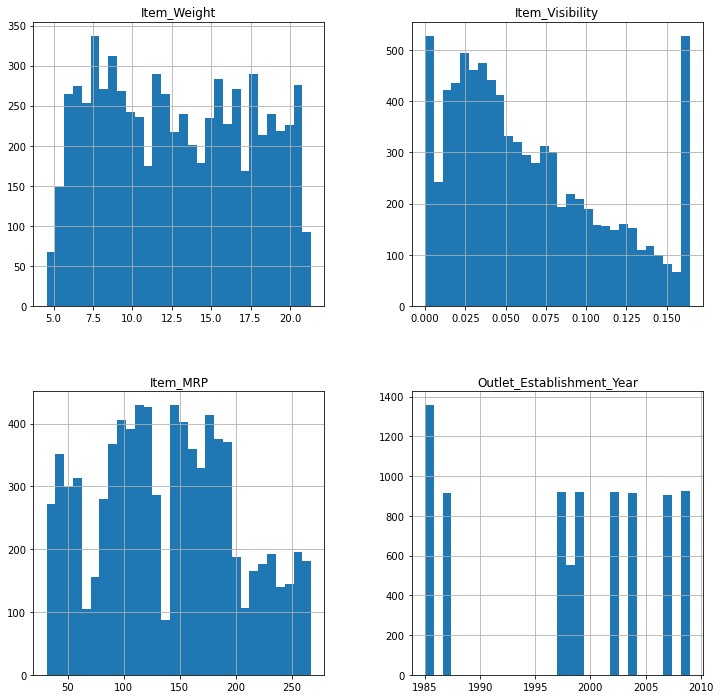

In [24]:
# plot the histogram to inspect variable distributions

data[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

Item_Weight


C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


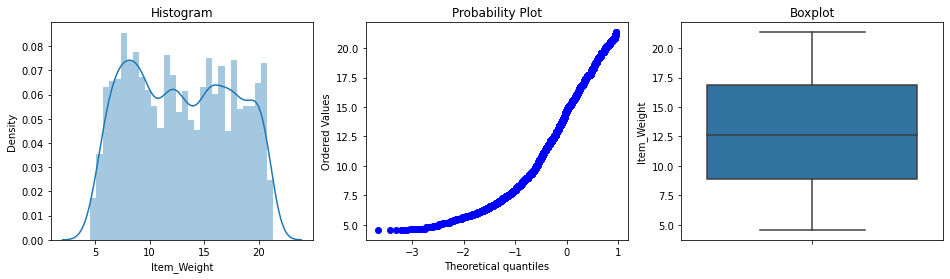

Item_Visibility


C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


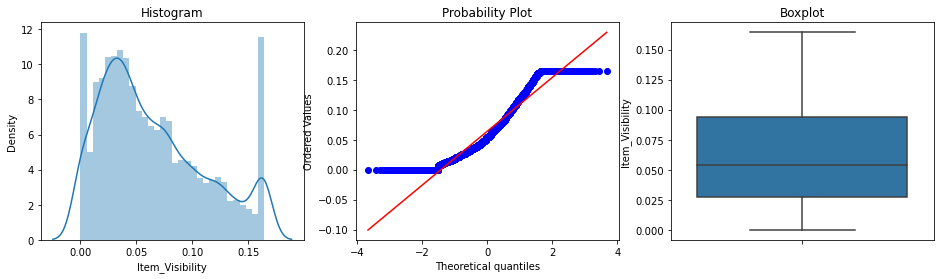

Item_MRP


C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


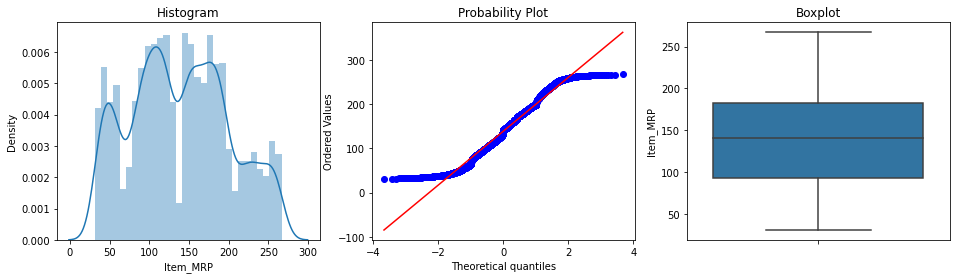

Outlet_Establishment_Year


C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


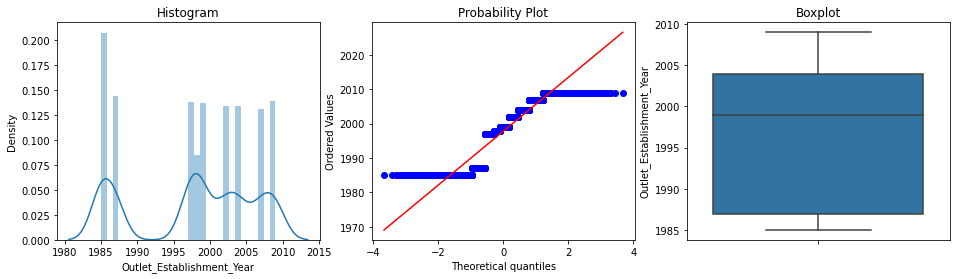

In [25]:
# Let us get an in-depth analysis using the diagnostic_plots function
for numV in num_cols:
    print(numV)
    diagnostic_plots(X_train, numV)

In [26]:
# Based on the histogram and diagnostic plots above we should onjy transform 'Item_Visibility' as it is the only skewd variable
# We are going to test out Power, and Yeo-Johnson transformation to see which returns the best result
# Unable to perform Logarithm, Reciprocal, and Box-Cox due to value of 0 being present in the column

# Starting with Cube_root transformation
et = PowerTransformer(variables = 'Item_Visibility', exp = 1/3)

et.fit(X_train)

X_train_et = et.transform(X_train)
X_test_et = et.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


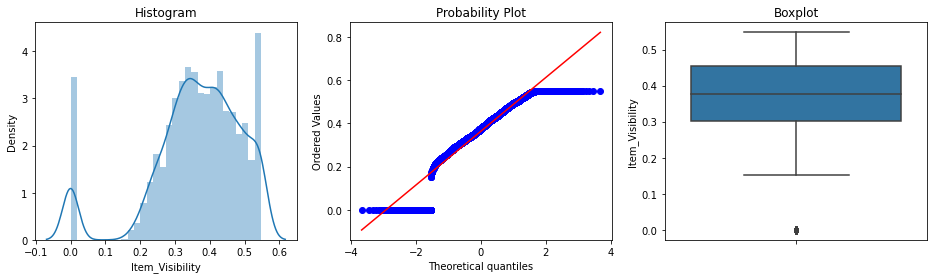

In [27]:
diagnostic_plots(X_train_et, 'Item_Visibility')

In [28]:
# Square_root transformation
et2 = PowerTransformer(variables = 'Item_Visibility', exp = 1/2)

et2.fit(X_train)

X_train_et2 = et2.transform(X_train)
X_test_et2 = et2.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


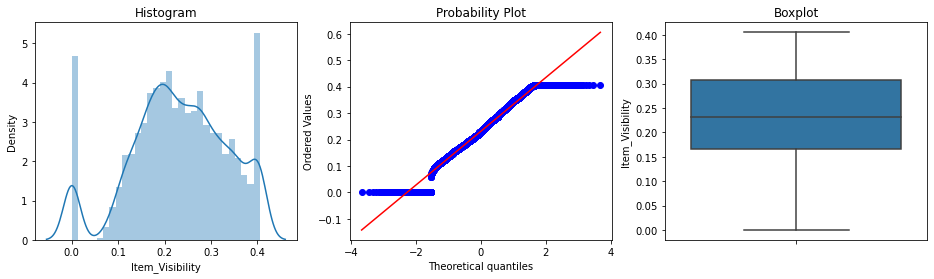

In [29]:
diagnostic_plots(X_train_et2, 'Item_Visibility')

In [30]:
# Power transformation
# Using exponential of 0.6 since square root gives the best result so far
et3 = PowerTransformer(variables = 'Item_Visibility', exp = 0.6)

et3.fit(X_train)

X_train_et3 = et3.transform(X_train)
X_test_et3 = et3.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


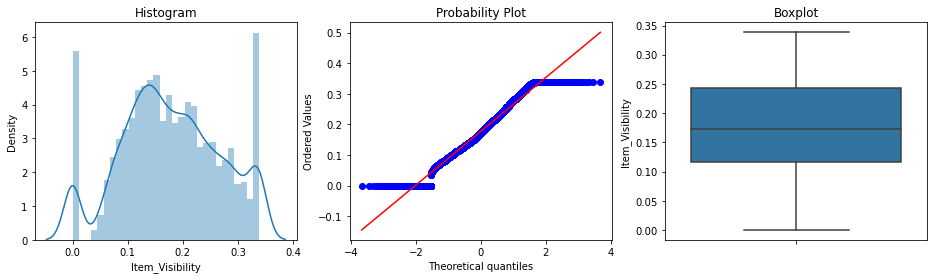

In [31]:
diagnostic_plots(X_train_et3, 'Item_Visibility')

In [32]:
# Yeo-Johnson transformation
yjt = YeoJohnsonTransformer(variables = 'Item_Visibility')

yjt.fit(X_train)

X_train_yjt = yjt.transform(X_train)
X_test_yjt = yjt.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


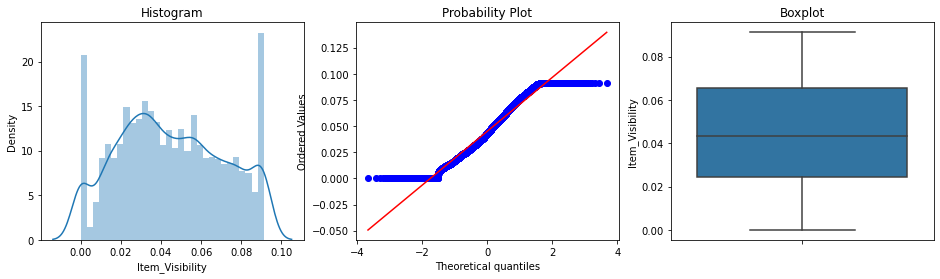

In [33]:
diagnostic_plots(X_train_yjt, 'Item_Visibility')

In this case, wee see that the yeo johnson transformer, power transformer, and square root transformer are very close to a normal distribution based on the histogram. When testing both transformer, the MSE and r square results are better when using the square root transformer and power transformer. However, the power transformer of 0.6 gives a slightly overall better results than the square root transformer. Hence, we will use the power transformer of 0.6

In [34]:
X_train = X_train_et3
X_test = X_test_et3

### Step 4: Missing Value Imputation <a id="4"></a>
[Back to top](#topNav)

In [35]:
# Visualise the percentage of null values in numerical columns
X_train[num_cols].isnull().sum().sort_values(ascending=False)

Item_Weight                  969
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
dtype: int64

In [36]:
# To remove the missing value, we will use mean imputation
mean_imputer = MeanMedianImputer(imputation_method='mean',
                                   variables='Item_Weight')

mean_imputer.fit(X_train)

X_train = mean_imputer.transform(X_train)
X_test = mean_imputer.transform(X_test)

In [37]:
# let us check again
X_train[num_cols].isnull().sum().sort_values(ascending=False)

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

In [38]:
# identify categorical cols
cat_cols = [c for c in data.columns if data[c].dtypes in ['O']]
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [39]:
# Visualise the percentage of null values for each columns
X_train[cat_cols].isnull().sum().sort_values(ascending=False)

Outlet_Size             1635
Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [40]:
# We will imputate the missing values of 'Outlet_Size' as an Arbitrary 'Missing'
cat_imputer = CategoricalImputer(variables='Outlet_Size')

cat_imputer.fit(X_train)

CategoricalImputer(variables='Outlet_Size')

In [41]:
X_train = cat_imputer.transform(X_train)
X_test = cat_imputer.transform(X_test)

In [42]:
# Let us check
X_train[cat_cols].isnull().sum().sort_values(ascending=False)

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

### Step 5: Categorical Data Encoding <a id="5"></a>
[Back to top](#topNav)

In [43]:
X_train[cat_cols].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
7569,NCP05,Low Fat,Health and Hygiene,OUT010,Missing,Tier 3,Grocery Store
891,FDW46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
1629,FDE56,Regular,Fruits and Vegetables,OUT017,Missing,Tier 2,Supermarket Type1
6195,NCP06,Low Fat,Household,OUT017,Missing,Tier 2,Supermarket Type1
2613,FDQ34,Low Fat,Snack Foods,OUT019,Small,Tier 1,Grocery Store


In [44]:
# Let us try one-hot encoding
ohe_enc = OneHotEncoder(
    top_categories=5,
    drop_last=False) 

ohe_enc.fit(X_train)

X_train_ohe = ohe_enc.transform(X_train)
X_test_ohe = ohe_enc.transform(X_test)

In [45]:
X_train_ohe.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_NCY18,Item_Identifier_FDL34,Item_Identifier_FDY49,Item_Identifier_FDR44,Item_Identifier_FDF56,Item_Fat_Content_Low Fat,...,Outlet_Size_Small,Outlet_Size_Missing,Outlet_Size_High,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 1,Outlet_Type_Supermarket Type1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7569,19.600000,0.149953,150.9024,1998,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
891,13.000000,0.203816,65.9484,2009,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1629,17.250000,0.333141,61.5194,2007,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
6195,20.700000,0.143796,151.7366,2007,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
2613,12.936915,0.338360,105.5622,1985,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [46]:
# Let use ordinal encoding
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=None)

ordinal_enc.fit(X_train)

X_train_ordinal = ordinal_enc.transform(X_train)
X_test_ordinal = ordinal_enc.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) Item_Identifier.
  warnings.warn(


In [47]:
X_train_ordinal.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7569,0,19.600000,0,0.149953,0,150.9024,0,1998,0,0,0
891,1,13.000000,1,0.203816,1,65.9484,1,2009,1,0,1
1629,2,17.250000,1,0.333141,2,61.5194,2,2007,0,1,2
6195,3,20.700000,0,0.143796,3,151.7366,2,2007,0,1,2
2613,4,12.936915,0,0.338360,1,105.5622,3,1985,2,2,0


In [48]:
# Let us use count or frequency encoding
count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables=None)

count_enc.fit(X_train)

X_train_count = count_enc.transform(X_train)
X_test_count = count_enc.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) Item_Identifier.
  warnings.warn(


In [49]:
X_train_count.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7569,6,19.600000,3814,0.149953,362,150.9024,395,1998,1635,2296,784
891,6,13.000000,2021,0.203816,846,65.9484,648,2009,1869,2296,648
1629,3,17.250000,2021,0.333141,833,61.5194,614,2007,1635,1865,3823
6195,5,20.700000,3814,0.143796,627,151.7366,614,2007,1635,1865,3823
2613,4,12.936915,3814,0.338360,846,105.5622,389,1985,1658,1674,784


In [50]:
# Let us use ordered ordinal encoding
ordinal_enc2 = OrdinalEncoder(
    encoding_method='ordered')

ordinal_enc2.fit(X_train, y_train)

X_train_ordered = ordinal_enc2.transform(X_train)
X_test_ordered = ordinal_enc2.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) Item_Identifier.
  warnings.warn(


In [51]:
X_train_ordered.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7569,1017,19.600000,0,0.149953,1,150.9024,0,1998,0,1,0
891,285,13.000000,1,0.203816,15,65.9484,2,2009,3,1,1
1629,364,17.250000,1,0.333141,12,61.5194,6,2007,0,2,2
6195,812,20.700000,0,0.143796,14,151.7366,6,2007,0,2,2
2613,247,12.936915,0,0.338360,15,105.5622,1,1985,1,0,0


In [52]:
# Let us use target mean encoding
mean_enc = MeanEncoder(variables=None)

mean_enc.fit(X_train, y_train)

X_train_mean = mean_enc.transform(X_train)
X_test_mean = mean_enc.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) Item_Identifier.
  warnings.warn(


In [53]:
X_train_mean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7569,2479.439200,19.600000,2028.741828,0.149953,1831.374861,150.9024,342.371216,1998,1730.025715,2040.177940,344.843637
891,989.600733,13.000000,2091.329522,0.203816,2179.812673,65.9484,1959.326104,2009,2457.515535,2040.177940,1959.326104
1629,1197.108400,17.250000,2091.329522,0.333141,2124.363184,61.5194,2268.651691,2007,1730.025715,2257.217651,2244.362165
6195,2055.457760,20.700000,2028.741828,0.143796,2177.486688,151.7366,2268.651691,2007,1730.025715,2257.217651,2244.362165
2613,926.294250,12.936915,2028.741828,0.338360,2179.812673,105.5622,347.354193,1985,1874.030232,1834.073374,344.843637


In [54]:
# Let us use rare label categories
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=4)  

rare_encoder.fit(X_train)

X_train_rare = rare_encoder.transform(X_train)
X_test_rare = rare_encoder.transform(X_test)

C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Item_Fat_Content is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Outlet_Size is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Outlet_Location_Type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\jaden\anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Outlet_Type is less than that indicated i

In [55]:
X_train_rare.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7569,Rare,19.600000,Low Fat,0.149953,Health and Hygiene,150.9024,OUT010,1998,Missing,Tier 3,Grocery Store
891,Rare,13.000000,Regular,0.203816,Snack Foods,65.9484,OUT018,2009,Medium,Tier 3,Supermarket Type2
1629,Rare,17.250000,Regular,0.333141,Fruits and Vegetables,61.5194,OUT017,2007,Missing,Tier 2,Supermarket Type1
6195,Rare,20.700000,Low Fat,0.143796,Household,151.7366,OUT017,2007,Missing,Tier 2,Supermarket Type1
2613,Rare,12.936915,Low Fat,0.338360,Snack Foods,105.5622,OUT019,1985,Small,Tier 1,Grocery Store


All of the categorical encoding technique are unable to be used when paired with PCA or Polynomial Expansion except for rare label encoding and one hot encoding. Since the results of MAE, MSE, and R square is better when using one hot encoding, we will use one hot encoding for our categorical transformation.

In [56]:
X_train = X_train_ohe
X_test = X_test_ohe

### Step 6: Variable Discretization /Binning <a id="6"></a>
[Back to top](#topNav)

In [57]:
# Let us view the numeric columns
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [58]:
# Let us see which variables need to be discretized
X_train[num_cols].nunique()

Item_Weight                   412
Item_Visibility              5117
Item_MRP                     4517
Outlet_Establishment_Year       9
dtype: int64

In [59]:
# We do not need to discretize Outlet_Establishment_Year as it has not much unique values to group
disc_var = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [60]:
# Using Equal Frequency Discretiser
disc = EqualFrequencyDiscretiser(
    q=27, variables=disc_var)

disc.fit(X_train)

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [61]:
# Using Equal Frequency Discretiser and categorical encoding
disc2 = EqualFrequencyDiscretiser(
    q=27, variables=disc_var, return_object=True)

disc2.fit(X_train)

train_t2 = disc2.transform(X_train)
test_t2 = disc2.transform(X_test)

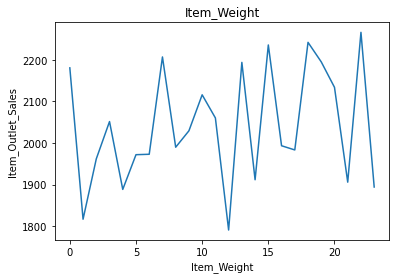

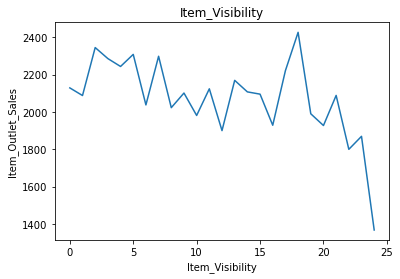

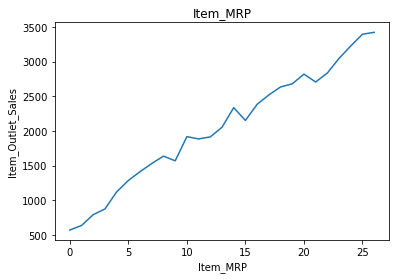

In [62]:
def line_chart(var, trainSet):
    plt.figure(figsize=(6, 4))
    pd.concat([trainSet, y_train], axis=1).groupby(var)['Item_Outlet_Sales'].mean().plot()
    plt.title(var)
    plt.ylabel('Item_Outlet_Sales')
    
for numV in disc_var:
    line_chart(numV, train_t2)

In [63]:
# let's order the bins

enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t2, y_train)

train_t2 = enc.transform(train_t2)
test_t2 = enc.transform(test_t2)

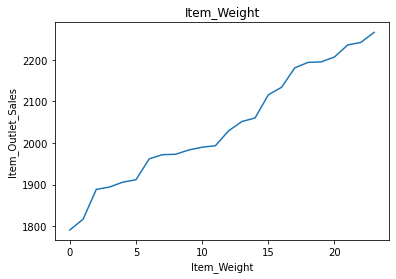

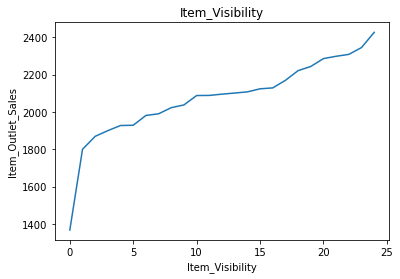

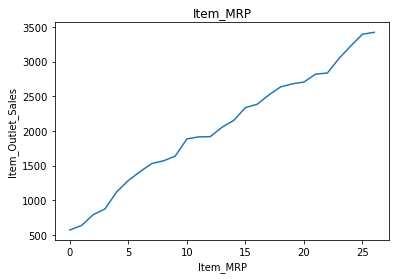

In [64]:
for numV in disc_var:
    line_chart(numV, train_t2)

In [65]:
# Using Equal Width Discretiser
disc_EW = EqualWidthDiscretiser(bins=27, variables = disc_var)

disc_EW.fit(X_train)

train_t3 = disc_EW.transform(X_train)
test_t3 = disc_EW.transform(X_test)

After all the trial and error, manage to generate a better MAE, R Square, and MSE results by using 27 bins and Equal Frequency Discretiser and categorical encoding

In [66]:
X_train = train_t2
X_test = test_t2

### Step 7: Feature Engineer <a id="7"></a>
[Back to top](#topNav)

In [67]:
# Let us perform some scaling techniques for variables to be in the same range
# We will try Standard Scaling, Mean Scaling, Min Max Scaling, Max Absolute Scaling/ w centering, and Robust Scaling
# We will use the three variables in disc_var to view the results of scaling

# using Standard Scaling
scaler_S = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_S.fit(X_train)

# transform train and test sets
X_train_S = scaler_S.transform(X_train)
X_test_S = scaler_S.transform(X_test)

In [68]:
X_train_S = pd.DataFrame(X_train_S, columns = X_train.columns)
X_test_S = pd.DataFrame(X_test_S, columns = X_train.columns)

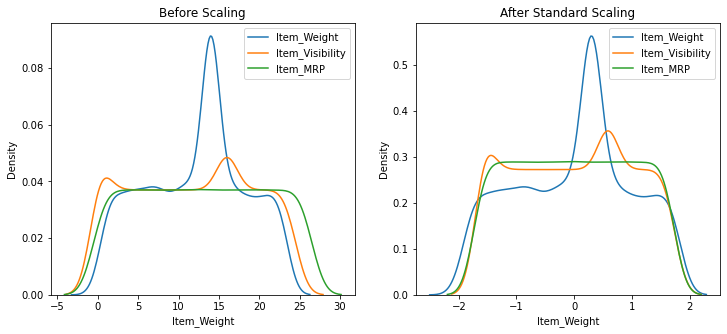

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in disc_var:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Standard Scaling')
for labels in disc_var:
    sns.kdeplot(X_train_S[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [70]:
# using Mean Scaling

# Let us find the mean
means = X_train.mean(axis=0)

# Let us find the range
ranges = X_train.max(axis=0)-X_train.min(axis=0)

# Perform Mean Scaling
X_train_M = (X_train-means)/ranges
X_test_M = (X_test-means)/ranges

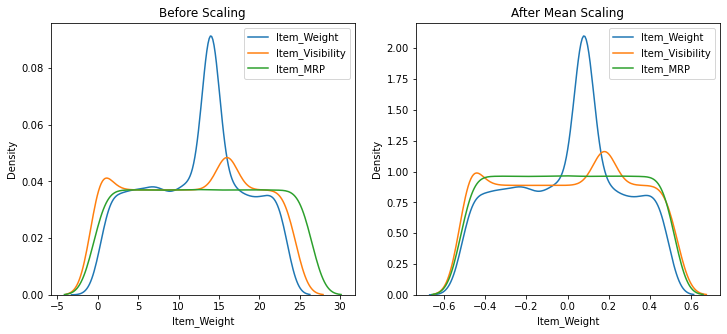

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in disc_var:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Mean Scaling')
for labels in disc_var:
    sns.kdeplot(X_train_M[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [72]:
#Using Mix Max Scaling
scaler_MMS = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_MMS.fit(X_train)

# transform train and test sets
X_train_MMS = scaler_MMS.transform(X_train)
X_test_MMS = scaler_MMS.transform(X_test)

In [73]:
X_train_MMS = pd.DataFrame(X_train_MMS, columns = X_train.columns)
X_test_MMS = pd.DataFrame(X_test_MMS, columns = X_train.columns)

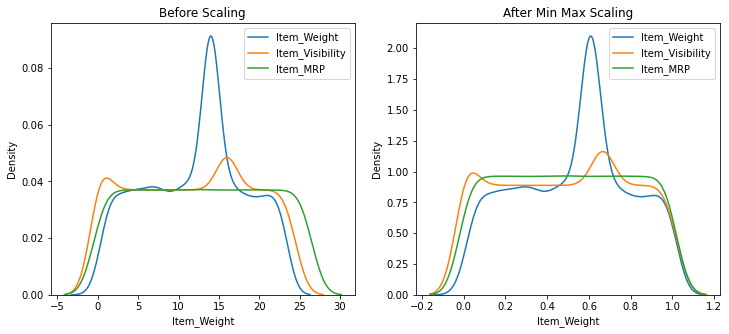

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in disc_var:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Min Max Scaling')
for labels in disc_var:
    sns.kdeplot(X_train_MMS[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [75]:
# Using Maximum Absoulte Scaling
scaler_MAS = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_MAS.fit(X_train)

# transform train and test sets
X_train_MAS = scaler_MAS.transform(X_train)
X_test_MAS = scaler_MAS.transform(X_test)

In [76]:
X_train_MAS = pd.DataFrame(X_train_MAS, columns = X_train.columns)
X_test_MAS = pd.DataFrame(X_test_MAS, columns = X_train.columns)

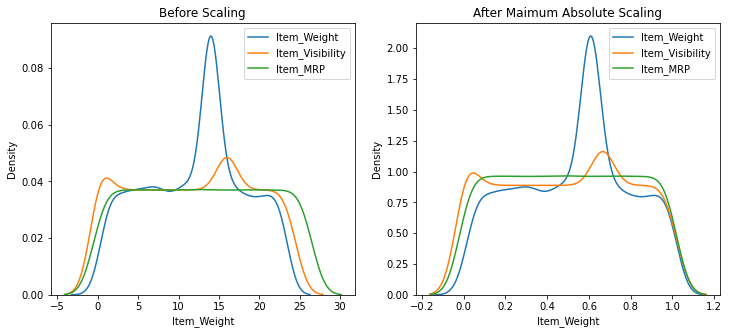

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in disc_var:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Maimum Absolute Scaling')
for labels in disc_var:
    sns.kdeplot(X_train_MAS[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [78]:
# Using Maximum Absoulte Scaling and Centering
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# transform train and test sets
X_train_MASC = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_MASC = scaler_maxabs.transform(scaler_mean.transform(X_test))

C:\Users\jaden\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(
C:\Users\jaden\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


In [79]:
X_train_MASC = pd.DataFrame(X_train_MASC, columns = X_train.columns)
X_test_MASC = pd.DataFrame(X_test_MASC, columns = X_train.columns)

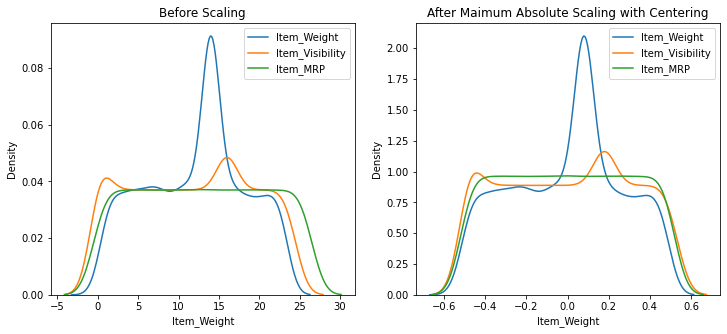

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in disc_var:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Maimum Absolute Scaling with Centering')
for labels in disc_var:
    sns.kdeplot(X_train_MASC[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

In [81]:
# Using Robust Scaling
scaler_R = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_R.fit(X_train)

# transform train and test sets
X_train_R = scaler_R.transform(X_train)
X_test_R = scaler_R.transform(X_test)

In [82]:
X_train_R = pd.DataFrame(X_train_R, columns = X_train.columns)
X_test_R = pd.DataFrame(X_test_R, columns = X_train.columns)

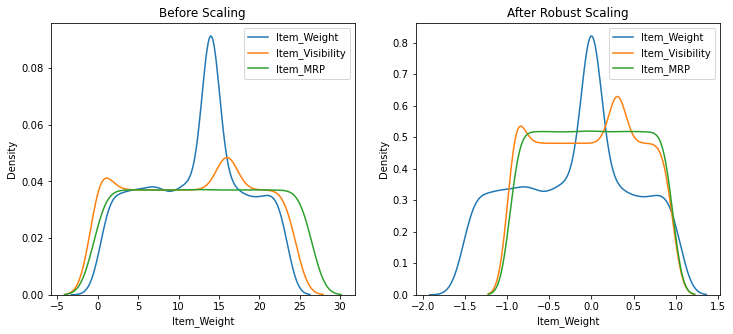

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for labels in disc_var:
    sns.kdeplot(X_train[labels], ax=ax1, label =labels)
ax1.legend()

# after scaling
ax2.set_title('After Robust Scaling')
for labels in disc_var:
    sns.kdeplot(X_train_R[labels], ax=ax2, label =labels)
ax2.legend()
plt.show()

After testing all the different scaling techniques, we have concluded that the Maximum Absoulte Scaling and Centering performs the best and gives us the best MSE, MAE, and R square value, so we will use the Maximum Absoulte Scaling and Centering

In [84]:
X_train = X_train_MASC
X_test = X_test_MASC

We will now perform features computation to reduce the dimension of our dataset in order for the model to process faster

In [85]:
# We will use PCA, and Polynomial Expansion to reduce our dimension

# We will start using PCA and remove 5% of the original data
pca = PCA(0.95)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [86]:
# Next we will use Polynomial Expansion
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

After testing both feature computation techniques, the polynomial expansion helped improved the MAE, MSE, and R square value. Hence, we will use polynomial expansion for our X_train and X_test

In [87]:
X_train = X_train_poly
X_test = X_test_poly

### Step 8: Linear Regression Modelling <a id="8"></a>
[Back to top](#topNav)

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [88]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model
X_train_student_final_premodel_version = X_train
X_test_student_final_premodel_version = X_test
 
y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

In [89]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [91]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 872770.997544486 
 test_mse: 997340.3213457685
train_r-sq: 0.6154613175108603 
 test_r-sq: 0.5594257554570665


In [92]:
print('train_mae:', mean_absolute_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mae:', mean_absolute_error(y_test_final, model_linear_regression.predict(X_test_final)))

train_mae: 678.1215982090831 
 test_mae: 724.253336071143


# Individual Report <a id="9"></a>
[Back to top](#topNav)

## Table of Contents<a id="top"></a>
#### 1. [Introduction: Problem Understanding](#part1)

#### 2. [Explore the Data](#part2)

#### 3. [Cleanse the Data](#part3)

#### 4. [Data Transformation](#part4)

#### 5. [Feature Engineer](#part5)

#### 6. [Linear Regression Model](#part6)

#### 7. [Summary and Further Improvements](#part7)

#### 8. [Recording Link](#part8)

## 1. Introduction: Problem Understanding <a id="part1"></a>
[Back to Content](#top)

In this report, we are given a dataset 'supermarket.csv' to perform data wrangling. The aim of this is for us to try and predict the sales of each product at a particular outlet in order for the supermarket management team to understand the properties of products and outlets which pay a key role in increasing sales and try to implement it in other outlets with low sales.

The report wil talk about data exploration and what columns there are in the dataset with 'Item_Outlet_Sales' as the target variable. After exploring the data, we will proceed to cleaning the data where we will identify any outliers, missing values, or different casing values. This will help the data to be more simplified and clean for us to train the machine learning model. Once we have completed cleaning the data, we will transform the numerical columns if needed into a normal distribution to simplify the process when training the machine learning model. 

Next, we will perform feature engineer on the dataset to reduce the number of columns in the data to increase the processing speed when trying to train the machine learning model with our dataset. Lastly, we will input our dataset into the linear regression model to test the Mean Square Error (MSE) and r2 to gauge where our dataset is at. We will try to reduce the scores as low as possible to improve the model performance.

To sum our experience, it will be written under the 'Summary and Further Improvements' section where we will talk about our experience and how we could further improve on the MSE and r2 results if given the knowledge in the future.

## 2. Explore the Data <a id="part2"></a>
[Back to Content](#top)

When exploring the data, we first look at the excel spreadsheet and understand the dataset we have in hand, while looking at the variable meaning and try to understand as much as we can. After understanding the basic idea of the dataset, we then use TIBCO Spotfire, a data visualization and analytics software, to plot out the visualization of different variables and try to identify a relationship within the different variables.

The first visualization created was a histogram and a box-plot of our target variable - 'Item_Outlet_Sales'. This will help us to understand the frequency of the item outlet sales as well as figure out whether there are outliers in the variable and identify the number of outliers present.

The second visualization made was the same as the first visualization, a histogram and box-plot of our target variable, but split up by colour or my data based on 'Item_Type' and 'Outlet_Type'. In this visualizations we see that for all Supermarket Type 3, they are doing the best in terms of item outlet sales and that for all Supermarket Type 1, they have made the most number of sales as they have the highest frequency shown in the histogram. In short, Supermarket Type 1 made the most number of sales while Supermarket Type 3 made the most amount on Sales. And we are unable to conlcude anything for item type as all items are performing averagely.

The third visualization shows a treemap of the different Outlet ID, sized by the item outlet sales and seperated based on the Outlet Location tier. From this, we see that the best performing outlet is OUT027 in tier 3 while the worst performing are OUT010 and OUT019 in tier 3 and tier 1 respectively.

The fourth visualization gives us a bar chart based on the outlet size and the item outlet sales seperated based on colour by the outlet id. This lets us see that there are missing values in the outlet size which will be dealt with. Furthermore, it helps us to identify the size of the worse and best performing outlets and whether outlet size affects the performance. And in this case, in does affect in some way for the worse performing outlets.

The last visualization is a line chart which shows the item visibility and the item outlet sales. From what we see, as item visibility increases, the average item outlet sale decreases. And when we drill down based on the outlet identifier, we see that the two worse perfoming outlet is pulling down the average item outlet sales and have item visibility more than the other outlets.

In summary, we have identified two outlets OUT010 and OUT019 having a bad performance based on our visualization. We may have to take note that these two outlets could affect our machine learning model. Furthemore, we have identified the outliers present in our target variable as well as the outlet type that is doing the best.

## 3. Cleanse the Data <a id="part3"></a>
[Back to Content](#top)

For cleaning the data, we first have a look at the unique values of each variable and look at them one by one. The first thing to clean was the repeat of values in the column 'Item_Fat_Content' where there are other values that has the same meaning as 'Low Fat' and 'Regular'. So we did a simple replacing of values to get two unique values in the 'Item_Fat_Content' column.

The next step was dealing with outliers, first we identified which variable has outliers which was 'Item_Visibility' and our target variable - 'Item_Outlet_Sales'. Next we identied those outliers and thought of ways to deal with it. For 'Item_Visibility' we dealt with their outliers by performing winsorisation, where you set all outliers below the 5th percentile to the value at the 5th percentile and all outliers above the 95th percentile to the value at the 95th percentile. For our target variable, we did trimming as we saw from the box-plot from our data exploration on TIBCO Spotfire. This helped to dissolve the outlier case for our dataset.

We move on to dealing with missing data. Firstly, we split the dataset into training and testing sets and we group the variables based on numeric and categorical and list out all columns and show the number of missing value for each variable. And we see that 'Item_Weight' and 'Outlet_Size' contain missing values. Hence, we perfom missing value imputation. In this, we use mean imputation to replace the missing values in 'Item_Weight' to be the mean of all the values in that column. We also use categorical imputation to replace the missing values in 'Outlet_Size' to be an arbitrary value named 'Missing'.

## 4. Data Transformation <a id="part4"></a>
[Back to Content](#top)

After cleaning the data, we moved on the data transformation which will help our machine learning model to process the categorical values and process the numeric values and a faster rate. So firstly, we start off by performing numeric transformation. We plot out histograms of all numeric variables to find which variable we should transform, and we were able to identify only 'Item_Visibility' had to be transformed as it is the only histogram that is right skewed. We tested out the different numeric transformation techniques such as Power, and Yeo-Johnson transformation to see which returns the best result, however we are unable to perform Logarithm, Reciprocal, and Box-Cox due to value of 0 being present in 'Item_Visibility'. The end result was the the power transformer with the power of 0.6 that gave the best MAE, MSE, and R square result. So, we used the Power transformation of 0.6 as our transformed X_train and X_test.

Next, we went and perform categorical transformation. So we used a few techniques which are one hot encoding, ordinal encoding, count or frequency encoding, ordered encoding, target mean encoding, and rare categories encoding. Eventually after trial and error, we decided to use one hot encoding as it was one of the few techniques that was able to pass through PCA and Polynomial Expansion and gave the best MAE, MSE, and R square result.

After that, we went ahead to discretize/ bin out numeric variables' values. For this, we check for the number of unique values of the numeric variables and found that all variables need to be discretize except for 'Outlet_Establishment_Year' as it only has 9 unique values while the other variables have hundreds of them. For the different techniques such as Equal Frequency Discretiser, Equal Frequency Discretiser and categorical encoding, and Equal Width Discretiser. In addition, after testing what number of bins that gave the best MAE, MSE, and R square result, we tested and found that 27 bins is the best overall. In the end, we used Equal Frequency Discretiser and categorical encoding with 27 bins after testing as it gave the best MAE, MSE, and R square result.

## 5. Feature Engineer <a id="part5"></a>
[Back to Content](#top)

For Feature Engineer, we started on with feature scaling make our variables to be of similar scale as many machine learning algorithms are sensitive to the scale and magnitude of the variables and variables with bigger value ranges tend to dominate over those with smaller ranges. The different feature scaling techniques tested were Standard Scaling, Mean Scaling, Min Max Scaling, Max Absolute Scaling with centering, and Robust Scaling. We also plot graphs for three variables 'Item_Weight', 'Item_Visibility', and 'Item_MRP' to view the before and after results of scaling. We then tested each of the scaling techniques and was able to conclude that Max Absolute Scaling with centering was the best scaling technique for our dataset as it was able to produce the best MAE, MSE, and R square result among the other scaling technique and we used Max Absolute Scaling with centering for the final model.

After we have done our feature scaling, we move on to features computation which will help to reduce the dimension of the dataset and allow for a faster processing speed into our machine learning model. The different techniques used were Principal Component Analysis (PCA) and Polynomial Expansion. For PCA, we decided remove 5% of the original data as we are not giving up much in coverage of the dataset. After testing both feature computation techniques, we see that Polynomial Expansion was able to improve our  MAE, MSE, and R square result significantly. Therefore, for our final model, we will use Polynomial Expansion as our feature scaling technique.

## 6. Linear Regression Model <a id="part6"></a>
[Back to Content](#top)

After we have completed all our cleaning, transforming, scaling, and computation, we are now able to proceed to the testing of our linear regression model. The linear regression model is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. Therefore, by using the linear regression model, we are able to figure out whether all the steps we did before is good enough for a machine learning mode. Firstly, we assigned our train and test datasets to the student final premodel version to run through the linear regression model. Once we have done that, we will import the mean_squared_error, mean_absolute_error, and r2_score function from sklearn to find out the predicted values. We add in the Mean Absolute Error (MAE), a measure of difference between two continuous variables, to test our training and testing dataset to have a clearer and more reliable results to show how bad or good the training and testing datasets are.

Final Results:<br>
train_mse: 872770.997544486 <br> 
test_mse: 997340.3213457685
 
train_r-sq: 0.6154613175108603 <br> 
test_r-sq: 0.5594257554570665
 
train_mae: 678.1215982090831 <br>
 test_mae: 724.253336071143
 
From the final results, we see that the MSE and MAE are still relatively high even after all the cleaning, transforming, scaling, and computation. There could be still be other ways to reduce it, but this is the best for now. Furthermore, the R square value is very low as having a value close to 1 is the best, but here we only got 0.603 and 0.568 on our train and test dataset respectively. Therefore, there is still room for improvement in our training and testing datasets.

## 7. Summary and Further Improvements <a id="part7"></a>
[Back to Content](#top)

To sum this up, we still have a long journey ahead of us to improve our train and test dataset. Furthermore, we find that two outlets performing badly in their item outlet sales are to be reviewed again due to them causing the dataset to be abnormal. Hence, we should either change the management of the outlets or close the outlet down to greatly improve our machine learning model.

In terms of improvements, we can try to manually remove variables that are not necessary, or we could manually compute them together during feature computation. However, we are still unsure how that might affect the final machine learning model, as to be safe, keeping all the variables seems like the better choice for now. So in the future, I hope to be able to understand how to manually perform feature computation to further improve the MAE, MSE, and R square result.

## 8. Recording Link <a id="part8"></a>
[Back to Content](#top)

https://youtu.be/VTLi_dE1BiU